In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import metrics
from keras.callbacks import History 

import tensorflow as tf

In [2]:
x = np.random.uniform(low = -10, high = 10, size = 100)
eps = np.random.normal(loc = 0, scale = 15, size = 100)

In [3]:
y = -3 * x + 5 + eps

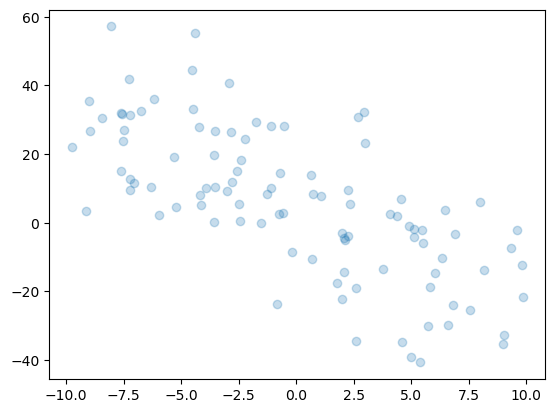

In [4]:
plt.scatter(x, y, alpha = 0.25)

In [5]:
np.mean(y)

5.951870153319246

In [6]:
a, b = np.polyfit(x, y, deg = 1)

In [7]:
a

-2.787701192358805

In [8]:
b

5.512138457300244

In [9]:
ypred = a * x + b

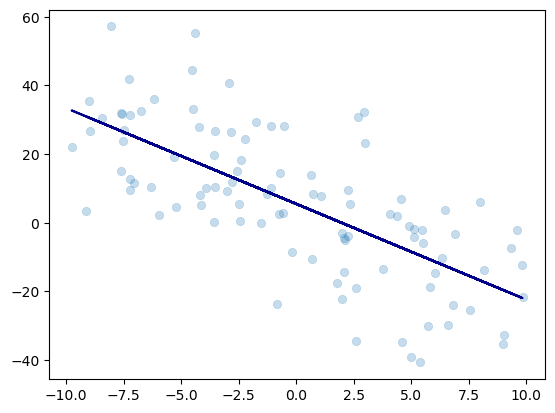

In [10]:
plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.plot(x, ypred, color = 'darkblue')

O método de mínimos quadrados encontra a reta que minimiza o erro quadrático. 

Vamos ver como uma rede neural lida minimizando o mesmo erro, o MSE (Mean Squared Error)?

Já sabemos que vai ser igual ou pior do que a do modelo linear, já que ele encontra a melhor reta em termos de MSE.

In [11]:
np.mean((ypred - y)**2) # O mínimo MSE possível é esse. É o limite inferior pra perda na nossa rede

230.34529573454233

### Fazendo a rede

Rede mais simples possível: uma camada com um só neurônio, que recebe o x e tenta ajustar o y, minimizando o erro quadrático médio.

Vamos usar um modelo Sequential, que é um empilhamento de camadas. https://keras.io/api/models/sequential/

In [12]:
rede_simples = keras.models.Sequential()
rede_simples.add(keras.layers.Dense(1, input_shape=(1, ))) # a vírgula é necessária quando temos só 1 dimensão


In [13]:
rede_simples.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Depois de definir o modelo, precisamos compilá-lo dando informações da otimização que queremos.

In [14]:
rede_simples.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=0.0001))

# Outro jeito de chamar o optimizer: keras.optimizers.SGD(). 
# Assim você consegue mudar características desse algoritmo tipo o tamanho do passo:
# keras.optimizers.SGD(learning_rate=0.0025)

In [15]:
rede_simples.summary() # 2 parâmetros: um peso e um viés -> será ajustado um modelo linear

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Para modelos mais complexos, eu gosto desse comando:
from keras.utils.vis_utils import plot_model
plot_model(rede_simples, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
rede_simples.fit(x, y, batch_size=5, epochs=40, verbose=2)

Epoch 1/40
20/20 - 5s - loss: 270.0512 - 5s/epoch - 257ms/step
Epoch 2/40
20/20 - 0s - loss: 259.2338 - 160ms/epoch - 8ms/step
Epoch 3/40
20/20 - 0s - loss: 242.3770 - 215ms/epoch - 11ms/step
Epoch 4/40
20/20 - 0s - loss: 241.9790 - 74ms/epoch - 4ms/step
Epoch 5/40
20/20 - 0s - loss: 256.9572 - 135ms/epoch - 7ms/step
Epoch 6/40
20/20 - 0s - loss: 259.8129 - 34ms/epoch - 2ms/step
Epoch 7/40
20/20 - 0s - loss: 249.0396 - 36ms/epoch - 2ms/step
Epoch 8/40
20/20 - 0s - loss: 264.3309 - 61ms/epoch - 3ms/step
Epoch 9/40
20/20 - 0s - loss: 259.0771 - 41ms/epoch - 2ms/step
Epoch 10/40
20/20 - 0s - loss: 258.2655 - 41ms/epoch - 2ms/step
Epoch 11/40
20/20 - 0s - loss: 240.9599 - 38ms/epoch - 2ms/step
Epoch 12/40
20/20 - 0s - loss: 237.3156 - 48ms/epoch - 2ms/step
Epoch 13/40
20/20 - 0s - loss: 269.6992 - 44ms/epoch - 2ms/step
Epoch 14/40
20/20 - 0s - loss: 250.4027 - 39ms/epoch - 2ms/step
Epoch 15/40
20/20 - 0s - loss: 258.0620 - 40ms/epoch - 2ms/step
Epoch 16/40
20/20 - 0s - loss: 261.8151 - 41m

In [18]:
rede_simples.get_weights()

[array([[-2.3701155]], dtype=float32), array([5.7570543], dtype=float32)]

In [19]:
# Previsões da rede:
ypred_rede = rede_simples.get_weights()[0]*x + rede_simples.get_weights()[1]

In [20]:
rede_simples.predict(x)

4/4 [==============================] - 0s 12ms/step


array([[ 14.233064  ],
       [  1.0410552 ],
       [ -9.864355  ],
       [ -8.063257  ],
       [  7.694982  ],
       [ 27.363373  ],
       [ 12.366257  ],
       [ -4.674617  ],
       [ -0.37328386],
       [ 16.203342  ],
       [-10.386674  ],
       [  4.077562  ],
       [  0.8456726 ],
       [  9.394658  ],
       [ -6.3526373 ],
       [-15.547492  ],
       [ -7.2176113 ],
       [  0.37538767],
       [  7.4132853 ],
       [ 14.986036  ],
       [ 21.690191  ],
       [ -7.050853  ],
       [  7.0054245 ],
       [ -0.593349  ],
       [ 20.709322  ],
       [ 23.442574  ],
       [ -3.881177  ],
       [ 11.541273  ],
       [  1.0519657 ],
       [ 14.254811  ],
       [ 23.573738  ],
       [ 16.477139  ],
       [ 25.724556  ],
       [ 14.097549  ],
       [ 12.869249  ],
       [-16.34676   ],
       [ 12.677803  ],
       [  0.7287555 ],
       [-17.578384  ],
       [ -3.159933  ],
       [ 11.675253  ],
       [ -9.281339  ],
       [ 23.842083  ],
       [  0

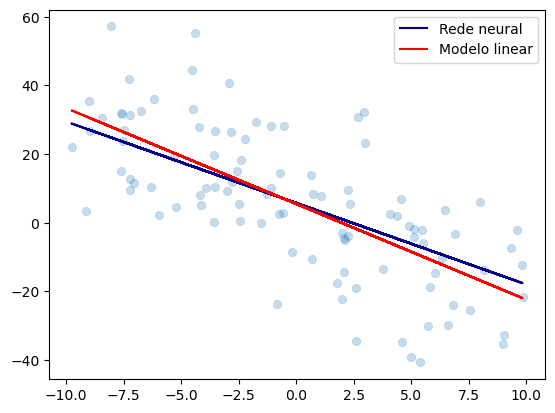

In [21]:
plt.scatter(x, y, alpha = 0.25, linewidths= 0.5)
plt.plot(x, ypred_rede[0], color = 'darkblue', label = 'Rede neural')
plt.plot(x, ypred, color = 'red', label = 'Modelo linear')
plt.legend()

In [22]:
np.mean((ypred_rede - y)**2)

235.4244063623994

In [23]:
# Caso queira salvar o modelo, use o método save
rede_simples.save("redinha")
# a extensão é um .h5, que é um formato de dados hierárquico muito usado em contextos científicos
# depois você carrega como:
reconstructed_model = keras.models.load_model("redinha")

INFO:tensorflow:Assets written to: redinha\assets


INFO:tensorflow:Assets written to: redinha\assets


Notas: não dividi a base em treino e teste. Só quis ajustar uma rede usando todos os pontos disponíveis e comparar com o modelo linear.